### Linear Regression model.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

file_path = 'response_times_original_2009-2014_cleaned_merged_final.csv'
data = pd.read_csv(file_path, low_memory=False)


In [29]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded = data_encoded.fillna(data_encoded.mean())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

all_columns = data_encoded.columns.tolist()
print(all_columns)

print(f"Total number of columns: {len(all_columns)}")

['Call_Year', 'Resp_Time', 'To_Hosp', 'Community_Type_Urban', 'Call_Loc_Community_Chilliwack', 'Call_Loc_Community_Kamloops', 'Call_Loc_Community_Kelowna', 'Call_Loc_Community_Langley', 'Call_Loc_Community_Nanaimo', 'Call_Loc_Community_Richmond', 'Call_Loc_Community_Saanich', 'Call_Loc_Community_Surrey', 'Call_Loc_Community_Vancouver', 'Call_Loc_Community_Victoria', 'Response_Mode_Initial_0', 'Response_Mode_Initial_1', 'Response_Mode_Initial_2', 'Response_Mode_Initial_3', 'Response_Mode_Initial_Description_non life threatening or deferrable', 'Response_Mode_Initial_Description_scheduled transfer or appointment', 'MPDS_Code_Initial_01a01', 'MPDS_Code_Initial_01c01', 'MPDS_Code_Initial_01c02', 'MPDS_Code_Initial_01c03', 'MPDS_Code_Initial_01c04', 'MPDS_Code_Initial_01c05', 'MPDS_Code_Initial_01c06', 'MPDS_Code_Initial_01d01', 'MPDS_Code_Initial_01o01', 'MPDS_Code_Initial_01o02', 'MPDS_Code_Initial_02a00', 'MPDS_Code_Initial_02a01', 'MPDS_Code_Initial_02a02', 'MPDS_Code_Initial_02b01', 'M

In [30]:
# Adjust the feature selection based on the actual column names
features = ['Call_Year', 'Community_Type_Urban', 'Call_Loc_Community_Chilliwack', 'Call_Loc_Community_Kamloops', 'Call_Loc_Community_Kelowna', 'Call_Loc_Community_Langley', 'Call_Loc_Community_Nanaimo', 'Call_Loc_Community_Richmond', 'Call_Loc_Community_Saanich', 'Call_Loc_Community_Surrey', 'Call_Loc_Community_Vancouver', 'Call_Loc_Community_Victoria', 'Response_Mode_Initial_0', 'Response_Mode_Initial_1', 'Response_Mode_Initial_2', 'Response_Mode_Initial_3', 'First_Responders_initial_FR Yes', 'Qualification_initial_HLA', 'Qualification_initial_NL-BLS', 'Response_Mode_initial_No L&S']
X = data_encoded[features]
y = data_encoded['Resp_Time']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Evaluate the Model
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"Test MAE: {mae_test}, Test RMSE: {rmse_test}")


Train MAE: 6.78621486347224, Train RMSE: 11.197510050360592
Test MAE: 6.764284665050942, Test RMSE: 11.163358152169348


Train MAE and RMSE: Indicates how well the model fits the training data.

Test MAE and RMSE: Indicates how well the model generalizes to unseen data (testing set).

In [31]:
# Calculate R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train R²: 0.18192276783879824
Test R²: 0.18231278683430407


In [32]:
# Calculate accuracy within a 10% margin
error_margin = 0.10

# Calculate percentage of accurate predictions
def calculate_accuracy(y_true, y_pred, margin):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy = calculate_accuracy(y_train, y_pred_train, error_margin)
test_accuracy = calculate_accuracy(y_test, y_pred_test, error_margin)

print(f"Train Accuracy within ±10%: {train_accuracy:.2f}%")
print(f"Test Accuracy within ±10%: {test_accuracy:.2f}%")

Train Accuracy within ±10%: 14.37%
Test Accuracy within ±10%: 14.39%


Train and Test Accuracy within ±10%: Indicates the percentage of predictions that are within 10% of the actual values for both the training and testing sets.

The model shows an MAE of approximately 6.75-6.79 and an RMSE of approximately 11.13-11.20, with an accuracy within ±10% around 14.37-14.47%. This suggests that while the model makes predictions with an average error of around 6.75-6.79, only about 14.37-14.47% of those predictions are within 10% of the actual values.

### Removing the outliers for my linear regression model

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = 'response_times_original_2009-2014_cleaned_merged_final.csv'
data = pd.read_csv(file_path, low_memory=False)

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= lower_bound) & (data['Resp_Time'] <= upper_bound)]

outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_encoded = pd.get_dummies(data_no_outliers, drop_first=True)
data_encoded = data_encoded.fillna(data_encoded.mean())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Adjust the feature selection based on the actual column names
features = ['Call_Year', 'Community_Type_Urban', 'Call_Loc_Community_Chilliwack', 'Call_Loc_Community_Kamloops', 'Call_Loc_Community_Kelowna', 'Call_Loc_Community_Langley', 'Call_Loc_Community_Nanaimo', 'Call_Loc_Community_Richmond', 'Call_Loc_Community_Saanich', 'Call_Loc_Community_Surrey', 'Call_Loc_Community_Vancouver', 'Call_Loc_Community_Victoria', 'Response_Mode_Initial_0', 'Response_Mode_Initial_1', 'Response_Mode_Initial_2', 'Response_Mode_Initial_3', 'First_Responders_initial_FR Yes', 'Qualification_initial_HLA', 'Qualification_initial_NL-BLS', 'Response_Mode_initial_No L&S']
X = data_encoded[features]
y = data_encoded['Resp_Time']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Evaluate the Model
y_pred_train = linear_regressor.predict(X_train)
y_pred_test = linear_regressor.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"Test MAE: {mae_test}, Test RMSE: {rmse_test}")


Number of outliers removed: 88806
Train MAE: 4.006539905976193, Train RMSE: 5.195519630780601
Test MAE: 3.9973480591240027, Test RMSE: 5.184400465694367


In [38]:
# Calculate R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train R²: 0.18102568253025397
Test R²: 0.17855432015007588


In [39]:
def calculate_accuracy(y_true, y_pred, margin):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy_10 = calculate_accuracy(y_train, y_pred_train, margin=0.10)
test_accuracy_10 = calculate_accuracy(y_test, y_pred_test, margin=0.10)
train_accuracy_20 = calculate_accuracy(y_train, y_pred_train, margin=0.20)
test_accuracy_20 = calculate_accuracy(y_test, y_pred_test, margin=0.20)
train_accuracy_30 = calculate_accuracy(y_train, y_pred_train, margin=0.30)
test_accuracy_30 = calculate_accuracy(y_test, y_pred_test, margin=0.30)

print(f"Train Accuracy within ±10%: {train_accuracy_10:.2f}%")
print(f"Test Accuracy within ±10%: {test_accuracy_10:.2f}%")
print(f"Train Accuracy within ±20%: {train_accuracy_20:.2f}%")
print(f"Test Accuracy within ±20%: {test_accuracy_20:.2f}%")
print(f"Train Accuracy within ±30%: {train_accuracy_30:.2f}%")
print(f"Test Accuracy within ±30%: {test_accuracy_30:.2f}%")

Train Accuracy within ±10%: 17.69%
Test Accuracy within ±10%: 17.62%
Train Accuracy within ±20%: 34.57%
Test Accuracy within ±20%: 34.60%
Train Accuracy within ±30%: 49.78%
Test Accuracy within ±30%: 49.87%


Train and Test Accuracy within ±10%, ±20%, ±30%: Indicates the percentage of predictions that are within 10%, 20%, 30% of the actual values for both the training and testing sets.

### Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_test_rf = rf_regressor.predict(X_test)

# Evaluate the model
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print(f"Random Forest Train MAE: {mae_train_rf}, Train RMSE: {rmse_train_rf}")
print(f"Random Forest Test MAE: {mae_test_rf}, Test RMSE: {rmse_test_rf}")

train_accuracy_rf = calculate_accuracy(y_train, y_pred_train_rf, error_margin)
test_accuracy_rf = calculate_accuracy(y_test, y_pred_test_rf, error_margin)

print(f"Random Forest Train Accuracy within ±10%: {train_accuracy_rf:.2f}%")
print(f"Random Forest Test Accuracy within ±10%: {test_accuracy_rf:.2f}%")


Random Forest Train MAE: 6.6390403366137, Train RMSE: 11.059869297818773
Random Forest Test MAE: 6.624572117293523, Test RMSE: 11.03876588404849
Random Forest Train Accuracy within ±10%: 15.08%
Random Forest Test Accuracy within ±10%: 15.09%


In [35]:
# Calculate R² Score
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Train R²: {r2_train_rf}")
print(f"Test R²: {r2_test_rf}")

Train R²: 0.20191091095987312
Test R²: 0.2004630575156151


### Removing the outliers for my Random Forest model

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = 'response_times_original_2009-2014_cleaned_merged_final.csv'
data = pd.read_csv(file_path, low_memory=False)

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= lower_bound) & (data['Resp_Time'] <= upper_bound)]

outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_encoded = pd.get_dummies(data_no_outliers, drop_first=True)
data_encoded = data_encoded.fillna(data_encoded.mean())

# Adjust the feature selection based on the actual column names
features = ['Call_Year', 'Community_Type_Urban', 'Call_Loc_Community_Chilliwack', 'Call_Loc_Community_Kamloops', 'Call_Loc_Community_Kelowna', 'Call_Loc_Community_Langley', 'Call_Loc_Community_Nanaimo', 'Call_Loc_Community_Richmond', 'Call_Loc_Community_Saanich', 'Call_Loc_Community_Surrey', 'Call_Loc_Community_Vancouver', 'Call_Loc_Community_Victoria', 'Response_Mode_Initial_0', 'Response_Mode_Initial_1', 'Response_Mode_Initial_2', 'Response_Mode_Initial_3', 'First_Responders_initial_FR Yes', 'Qualification_initial_HLA', 'Qualification_initial_NL-BLS', 'Response_Mode_initial_No L&S']
X = data_encoded[features]
y = data_encoded['Resp_Time']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_test_rf = rf_regressor.predict(X_test)

# Evaluate the model
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print(f"Random Forest Train MAE: {mae_train_rf}, Train RMSE: {rmse_train_rf}")
print(f"Random Forest Test MAE: {mae_test_rf}, Test RMSE: {rmse_test_rf}")

# Calculate accuracy within a 10% margin
def calculate_accuracy(y_true, y_pred, margin):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy_rf = calculate_accuracy(y_train, y_pred_train_rf, margin=0.10)
test_accuracy_rf = calculate_accuracy(y_test, y_pred_test_rf, margin=0.10)

print(f"Random Forest Train Accuracy within ±10%: {train_accuracy_rf:.2f}%")
print(f"Random Forest Test Accuracy within ±10%: {test_accuracy_rf:.2f}%")


Number of outliers removed: 88806
Random Forest Train MAE: 3.982374593185231, Train RMSE: 5.1687901784554
Random Forest Test MAE: 3.976216595516895, Test RMSE: 5.160147275428999
Random Forest Train Accuracy within ±10%: 17.80%
Random Forest Test Accuracy within ±10%: 17.75%


In [47]:
# Calculate R² Score
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Train R²: {r2_train_rf}")
print(f"Test R²: {r2_test_rf}")

Train R²: 0.18885635034581416
Test R²: 0.18556869608030968


### LSTM Model

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')

data = pd.get_dummies(data, drop_first=True)
data = data.fillna(data.mean())

X = data.drop('Resp_Time', axis=1)
y = data['Resp_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM network model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Make predictions in batches to avoid memory issues
batch_size = 1024  # Adjust the batch size as needed
y_pred_train = np.zeros_like(y_train)
y_pred_test = np.zeros_like(y_test)

for i in range(0, len(X_train), batch_size):
    y_pred_train[i:i+batch_size] = model.predict(X_train[i:i+batch_size]).flatten()

for i in range(0, len(X_test), batch_size):
    y_pred_test[i:i+batch_size] = model.predict(X_test[i:i+batch_size]).flatten()

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"LSTM Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"LSTM Test MAE: {mae_test}, Test RMSE: {rmse_test}")

def calculate_accuracy(y_true, y_pred, margin=0.10):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy = calculate_accuracy(y_train, y_pred_train, margin=0.10)
test_accuracy = calculate_accuracy(y_test, y_pred_test, margin=0.10)

print(f"LSTM Train Accuracy within ±10%: {train_accuracy:.2f}%")
print(f"LSTM Test Accuracy within ±10%: {test_accuracy:.2f}%")


/var/folders/vl/xzh_hz6x4w561b9bv8p5w8wm0000gn/T/ipykernel_20400/3088237244.py:11: DtypeWarning: Columns (3,4,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')


Epoch 1/100


2024-07-28 16:48:22.909388: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9482/9482 [==============================] - 57s 6ms/step - loss: 88.4236 - val_loss: 70.1358 - lr: 0.0010
Epoch 2/100
9482/9482 [==============================] - 43s 5ms/step - loss: 77.4706 - val_loss: 67.5104 - lr: 0.0010
Epoch 3/100
9482/9482 [==============================] - 43s 5ms/step - loss: 74.4755 - val_loss: 66.2017 - lr: 0.0010
Epoch 4/100
9482/9482 [==============================] - 50s 5ms/step - loss: 72.5634 - val_loss: 66.2596 - lr: 0.0010
Epoch 5/100
9482/9482 [==============================] - 49s 5ms/step - loss: 71.3539 - val_loss: 66.4006 - lr: 0.0010
Epoch 6/100
9482/9482 [==============================] - 49s 5ms/step - loss: 70.8238 - val_loss: 65.7288 - lr: 0.0010
Epoch 7/100
9482/9482 [==============================] - 47s 5ms/step - loss: 70.2515 - val_loss: 65.2867 - lr: 0.0010
Epoch 8/100
9482/9482 [==============================] - 48s 5ms/step - loss: 69.9291 - val_loss: 65.8189 - lr: 0.0010
Epoch 9/100
9482/9482 [==============================] - 49s

In [49]:
# Calculate R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train R²: 0.6242300913730454
Test R²: 0.5872317926295036


/var/folders/vl/xzh_hz6x4w561b9bv8p5w8wm0000gn/T/ipykernel_1538/2903013323.py:7: DtypeWarning: Columns (3,4,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')


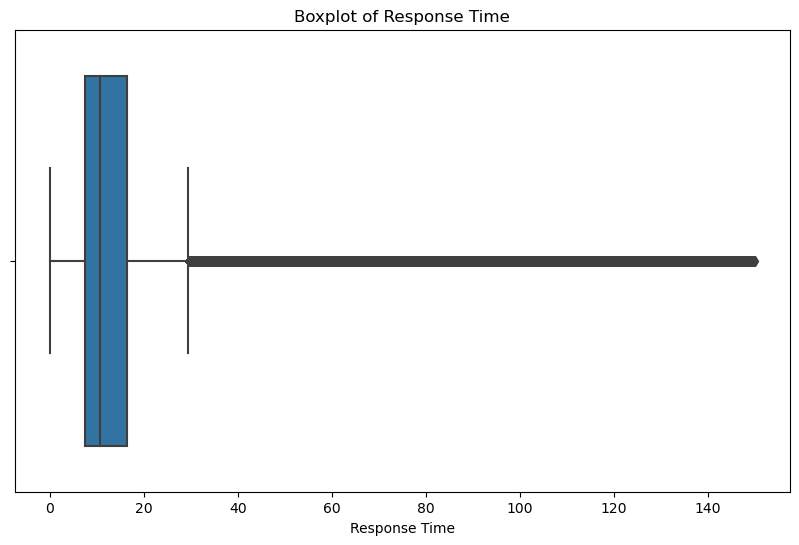

Lower Bound: -5.6, Upper Bound: 29.599999999999998
Number of outliers: 88806


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')

# Visualize outliers in 'Resp_Time' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Resp_Time'])
plt.title('Boxplot of Response Time')
plt.xlabel('Response Time')
plt.show()

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of outliers: {((data['Resp_Time'] < lower_bound) | (data['Resp_Time'] > upper_bound)).sum()}")


### LTSM outliers removed

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= 0) & (data['Resp_Time'] <= upper_bound)]

# Print the number of outliers removed
outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_no_outliers = pd.get_dummies(data_no_outliers, drop_first=True)
data_no_outliers = data_no_outliers.fillna(data_no_outliers.mean())

# Feature selection
X = data_no_outliers.drop('Resp_Time', axis=1)
y = data_no_outliers['Resp_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM network model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"LSTM Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"LSTM Test MAE: {mae_test}, Test RMSE: {rmse_test}")

# Calculate accuracy within a 10% margin
def calculate_accuracy(y_true, y_pred, margin=0.10):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy = calculate_accuracy(y_train, y_pred_train, margin=0.10)
test_accuracy = calculate_accuracy(y_test, y_pred_test, margin=0.10)

print(f"LSTM Train Accuracy within ±10%: {train_accuracy:.2f}%")
print(f"LSTM Test Accuracy within ±10%: {test_accuracy:.2f}%")


/var/folders/vl/xzh_hz6x4w561b9bv8p5w8wm0000gn/T/ipykernel_20400/848945378.py:11: DtypeWarning: Columns (3,4,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')


Number of outliers removed: 88806
Epoch 1/100
8705/8705 [==============================] - 51s 6ms/step - loss: 27.7725 - val_loss: 22.4565 - lr: 0.0010
Epoch 2/100
8705/8705 [==============================] - 48s 6ms/step - loss: 24.0244 - val_loss: 21.9641 - lr: 0.0010
Epoch 3/100
8705/8705 [==============================] - 48s 6ms/step - loss: 23.1806 - val_loss: 21.7708 - lr: 0.0010
Epoch 4/100
8705/8705 [==============================] - 45s 5ms/step - loss: 22.8079 - val_loss: 21.6972 - lr: 0.0010
Epoch 5/100
8705/8705 [==============================] - 40s 5ms/step - loss: 22.5055 - val_loss: 21.8319 - lr: 0.0010
Epoch 6/100
8705/8705 [==============================] - 39s 4ms/step - loss: 22.3446 - val_loss: 21.7458 - lr: 0.0010
Epoch 7/100
8705/8705 [==============================] - 39s 4ms/step - loss: 22.2872 - val_loss: 21.6194 - lr: 0.0010
Epoch 8/100
8705/8705 [==============================] - 40s 5ms/step - loss: 22.2162 - val_loss: 21.6809 - lr: 0.0010
Epoch 9/100
87

In [51]:
# Calculate R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train R²: 0.3803541569395462
Test R²: 0.3564834036314034


### LTSM With Hyperparameter tuning 

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
import keras_tuner as kt

data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= 0) & (data['Resp_Time'] <= upper_bound)]

# Print the number of outliers removed
outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_no_outliers = pd.get_dummies(data_no_outliers, drop_first=True)
data_no_outliers = data_no_outliers.fillna(data_no_outliers.mean())

# Feature selection
X = data_no_outliers.drop('Resp_Time', axis=1)
y = data_no_outliers['Resp_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the model
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32))))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(BatchNormalization())
    model.add(Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Set up the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"The best hyperparameters are: {best_hps.values}")

# Build the best model and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"LSTM Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"LSTM Test MAE: {mae_test}, Test RMSE: {rmse_test}")

# Calculate accuracy within a 10% margin
def calculate_accuracy(y_true, y_pred, margin=0.10):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy = calculate_accuracy(y_train, y_pred_train, margin=0.10)
test_accuracy = calculate_accuracy(y_test, y_pred_test, margin=0.10)

print(f"LSTM Train Accuracy within ±10%: {train_accuracy:.2f}%")
print(f"LSTM Test Accuracy within ±10%: {test_accuracy:.2f}%")


Trial 90 Complete [00h 56m 16s]
val_loss: 21.354246139526367

Best val_loss So Far: 21.252851486206055
Total elapsed time: 1d 01h 51m 49s
The best hyperparameters are: {'units': 32, 'dropout': 0.2, 'dense_units': 64, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0047'}
Epoch 1/100
8705/8705 [==============================] - 39s 4ms/step - loss: 26.1638 - val_loss: 22.4227 - lr: 0.0010
Epoch 2/100
8705/8705 [==============================] - 29s 3ms/step - loss: 23.3200 - val_loss: 21.9886 - lr: 0.0010
Epoch 3/100
8705/8705 [==============================] - 28s 3ms/step - loss: 22.7848 - val_loss: 21.8999 - lr: 0.0010
Epoch 4/100
8705/8705 [==============================] - 29s 3ms/step - loss: 22.5294 - val_loss: 21.7554 - lr: 0.0010
Epoch 5/100
8705/8705 [==============================] - 29s 3ms/step - loss: 22.3417 - val_loss: 21.6507 - lr: 0.0010
Epoch 6/100
8705/8705 [==============================] - 29s 3ms/step - loss:

### XG Boost

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = 'response_times_original_2009-2014_cleaned_merged_final.csv'
data = pd.read_csv(file_path, low_memory=False)

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= lower_bound) & (data['Resp_Time'] <= upper_bound)]

# Print the number of outliers removed
outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_encoded = pd.get_dummies(data_no_outliers, drop_first=True)
data_encoded = data_encoded.fillna(data_encoded.mean())

# Adjust the feature selection based on the actual column names
features = ['Call_Year', 'Community_Type_Urban', 'Call_Loc_Community_Chilliwack', 'Call_Loc_Community_Kamloops', 'Call_Loc_Community_Kelowna', 'Call_Loc_Community_Langley', 'Call_Loc_Community_Nanaimo', 'Call_Loc_Community_Richmond', 'Call_Loc_Community_Saanich', 'Call_Loc_Community_Surrey', 'Call_Loc_Community_Vancouver', 'Call_Loc_Community_Victoria', 'Response_Mode_Initial_0', 'Response_Mode_Initial_1', 'Response_Mode_Initial_2', 'Response_Mode_Initial_3', 'First_Responders_initial_FR Yes', 'Qualification_initial_HLA', 'Qualification_initial_NL-BLS', 'Response_Mode_initial_No L&S']
X = data_encoded[features]
y = data_encoded['Resp_Time']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
xg_regressor = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train_xg = xg_regressor.predict(X_train)
y_pred_test_xg = xg_regressor.predict(X_test)

# Evaluate the model
mae_train_xg = mean_absolute_error(y_train, y_pred_train_xg)
rmse_train_xg = np.sqrt(mean_squared_error(y_train, y_pred_train_xg))
mae_test_xg = mean_absolute_error(y_test, y_pred_test_xg)
rmse_test_xg = np.sqrt(mean_squared_error(y_test, y_pred_test_xg))

print(f"XGBoost Train MAE: {mae_train_xg}, Train RMSE: {rmse_train_xg}")
print(f"XGBoost Test MAE: {mae_test_xg}, Test RMSE: {rmse_test_xg}")

# Calculate accuracy within a 10% margin
def calculate_accuracy(y_true, y_pred, margin):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy_xg = calculate_accuracy(y_train, y_pred_train_xg, margin=0.10)
test_accuracy_xg = calculate_accuracy(y_test, y_pred_test_xg, margin=0.10)

print(f"XGBoost Train Accuracy within ±10%: {train_accuracy_xg:.2f}%")
print(f"XGBoost Test Accuracy within ±10%: {test_accuracy_xg:.2f}%")


Number of outliers removed: 88806
XGBoost Train MAE: 3.998077631448368, Train RMSE: 5.183683589036077
XGBoost Test MAE: 3.9866993008037444, Test RMSE: 5.168790713187796
XGBoost Train Accuracy within ±10%: 17.70%
XGBoost Test Accuracy within ±10%: 17.72%


In [58]:
# Calculate R² Score
r2_train_xg = r2_score(y_train, y_pred_train_xg)
r2_test_xg = r2_score(y_test, y_pred_test_xg)

print(f"Train R²: {r2_train_xg}")
print(f"Test R²: {r2_test_xg}")

Train R²: 0.18417513879617387
Test R²: 0.18283800580800402


### XG Boost With Hyperparameter Tuning

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# Load the dataset
file_path = 'response_times_original_2009-2014_cleaned_merged_final.csv'
data = pd.read_csv(file_path, low_memory=False)

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= lower_bound) & (data['Resp_Time'] <= upper_bound)]

# Print the number of outliers removed
outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_encoded = pd.get_dummies(data_no_outliers, drop_first=True)
data_encoded = data_encoded.fillna(data_encoded.mean())

# Feature selection
X = data_encoded.drop('Resp_Time', axis=1)
y = data_encoded['Resp_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection with SelectKBest
k_best = SelectKBest(f_regression, k=20)
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [10, 20, 30]
}

# Initialize the XGBoost model
xg_regressor = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Perform Randomized Search for Hyperparameter Tuning
random_search = RandomizedSearchCV(estimator=xg_regressor, param_distributions=param_grid,
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_xg_regressor = random_search.best_estimator_
best_xg_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train_xg = best_xg_regressor.predict(X_train)
y_pred_test_xg = best_xg_regressor.predict(X_test)

# Evaluate the model
mae_train_xg = mean_absolute_error(y_train, y_pred_train_xg)
rmse_train_xg = np.sqrt(mean_squared_error(y_train, y_pred_train_xg))
mae_test_xg = mean_absolute_error(y_test, y_pred_test_xg)
rmse_test_xg = np.sqrt(mean_squared_error(y_test, y_pred_test_xg))

print(f"XGBoost Train MAE: {mae_train_xg}, Train RMSE: {rmse_train_xg}")
print(f"XGBoost Test MAE: {mae_test_xg}, Test RMSE: {rmse_test_xg}")

# Calculate accuracy within a 10% margin
def calculate_accuracy(y_true, y_pred, margin):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy_xg = calculate_accuracy(y_train, y_pred_train_xg, margin=0.10)
test_accuracy_xg = calculate_accuracy(y_test, y_pred_test_xg, margin=0.10)

print(f"XGBoost Train Accuracy within ±10%: {train_accuracy_xg:.2f}%")
print(f"XGBoost Test Accuracy within ±10%: {test_accuracy_xg:.2f}%")


Number of outliers removed: 88806
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.9s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   7.0s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   7.1s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   7.2s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   7.2s
[CV] END alpha=30, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300; total time=  12.0s
[CV] END alpha=30, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300; total time=  12.2s
[CV] END alpha=30, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300; total time=  12.3s
[CV] END alpha=30, 

In [60]:
# Calculate R² Score
r2_train_xg = r2_score(y_train, y_pred_train_xg)
r2_test_xg = r2_score(y_test, y_pred_test_xg)

print(f"Train R²: {r2_train_xg}")
print(f"Test R²: {r2_test_xg}")

Train R²: 0.3151712379107835
Test R²: 0.3137841207931703


### Tuned LTSM

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= 0) & (data['Resp_Time'] <= upper_bound)]

# Print the number of outliers removed
outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_no_outliers = pd.get_dummies(data_no_outliers, drop_first=True)
data_no_outliers = data_no_outliers.fillna(data_no_outliers.mean())

# Feature selection
X = data_no_outliers.drop('Resp_Time', axis=1)
y = data_no_outliers['Resp_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Best hyperparameters found from the previous tuning
best_hyperparameters = {
    'units': 32,
    'dropout': 0.2,
    'dense_units': 64
}

# Build the model using the best hyperparameters
model = Sequential()
model.add(Bidirectional(LSTM(units=best_hyperparameters['units'], return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(best_hyperparameters['dropout']))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=best_hyperparameters['units'])))
model.add(Dropout(best_hyperparameters['dropout']))
model.add(BatchNormalization())
model.add(Dense(best_hyperparameters['dense_units'], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(best_hyperparameters['dropout']))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"LSTM Train MAE: {mae_train}, Train RMSE: {rmse_train}")
print(f"LSTM Test MAE: {mae_test}, Test RMSE: {rmse_test}")

# Calculate accuracy within a 10% margin
def calculate_accuracy(y_true, y_pred, margin=0.10):
    accuracy_count = np.sum(np.abs((y_true - y_pred) / y_true) <= margin)
    total_count = len(y_true)
    accuracy_percentage = (accuracy_count / total_count) * 100
    return accuracy_percentage

train_accuracy = calculate_accuracy(y_train, y_pred_train, margin=0.10)
test_accuracy = calculate_accuracy(y_test, y_pred_test, margin=0.10)

print(f"LSTM Train Accuracy within ±10%: {train_accuracy:.2f}%")
print(f"LSTM Test Accuracy within ±10%: {test_accuracy:.2f}%")


/var/folders/vl/xzh_hz6x4w561b9bv8p5w8wm0000gn/T/ipykernel_20400/4156589420.py:11: DtypeWarning: Columns (3,4,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('response_times_original_2009-2014_cleaned_merged_final.csv')


Number of outliers removed: 88806
Epoch 1/100
8705/8705 [==============================] - 35s 4ms/step - loss: 26.4239 - val_loss: 22.4836 - lr: 0.0010
Epoch 2/100
8705/8705 [==============================] - 28s 3ms/step - loss: 23.4361 - val_loss: 21.9740 - lr: 0.0010
Epoch 3/100
8705/8705 [==============================] - 28s 3ms/step - loss: 22.9170 - val_loss: 22.1465 - lr: 0.0010
Epoch 4/100
8705/8705 [==============================] - 28s 3ms/step - loss: 22.6208 - val_loss: 22.2013 - lr: 0.0010
Epoch 5/100
8705/8705 [==============================] - 27s 3ms/step - loss: 22.4336 - val_loss: 21.6919 - lr: 0.0010
Epoch 6/100
8705/8705 [==============================] - 28s 3ms/step - loss: 22.2892 - val_loss: 21.6132 - lr: 0.0010
Epoch 7/100
8705/8705 [==============================] - 28s 3ms/step - loss: 22.1640 - val_loss: 21.5752 - lr: 0.0010
Epoch 8/100
8705/8705 [==============================] - 29s 3ms/step - loss: 22.0543 - val_loss: 21.5619 - lr: 0.0010
Epoch 9/100
87

In [53]:
# Calculate R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")


Train R²: 0.38650043474156526
Test R²: 0.3573412783294073


### Ensemble Model

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

file_path = 'response_times_original_2009-2014_cleaned_merged_final.csv'
data = pd.read_csv(file_path, low_memory=False)

# Calculate the IQR for 'Resp_Time'
Q1 = data['Resp_Time'].quantile(0.25)
Q3 = data['Resp_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Resp_Time'] >= lower_bound) & (data['Resp_Time'] <= upper_bound)]

# Print the number of outliers removed
outliers_removed = len(data) - len(data_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Preprocessing
data_encoded = pd.get_dummies(data_no_outliers, drop_first=True)
data_encoded = data_encoded.fillna(data_encoded.mean())

# Feature selection
X = data_encoded.drop('Resp_Time', axis=1)
y = data_encoded['Resp_Time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection with SelectKBest
k_best = SelectKBest(f_regression, k=20)
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Standardize the data for LSTM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 1. XGBoost Model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [10, 20, 30]
}

xg_regressor = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=xg_regressor, param_distributions=param_grid,
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_kbest, y_train)

best_xg_regressor = random_search.best_estimator_
best_xg_regressor.fit(X_train_kbest, y_train)

# Make predictions
y_pred_train_xg = best_xg_regressor.predict(X_train_kbest)
y_pred_test_xg = best_xg_regressor.predict(X_test_kbest)

# Evaluate the XGBoost model
mae_train_xg = mean_absolute_error(y_train, y_pred_train_xg)
rmse_train_xg = np.sqrt(mean_squared_error(y_train, y_pred_train_xg))
mae_test_xg = mean_absolute_error(y_test, y_pred_test_xg)
rmse_test_xg = np.sqrt(mean_squared_error(y_test, y_pred_test_xg))

print(f"XGBoost Train MAE: {mae_train_xg}, Train RMSE: {rmse_train_xg}")
print(f"XGBoost Test MAE: {mae_test_xg}, Test RMSE: {rmse_test_xg}")

# 2. LSTM Model
best_hyperparameters = {
    'units': 32,
    'dropout': 0.2,
    'dense_units': 64
}

model = Sequential()
model.add(Bidirectional(LSTM(units=best_hyperparameters['units'], return_sequences=True), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(best_hyperparameters['dropout']))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=best_hyperparameters['units'])))
model.add(Dropout(best_hyperparameters['dropout']))
model.add(BatchNormalization())
model.add(Dense(best_hyperparameters['dense_units'], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(best_hyperparameters['dropout']))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.fit(X_train_lstm, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Make predictions
y_pred_train_lstm = model.predict(X_train_lstm).flatten()
y_pred_test_lstm = model.predict(X_test_lstm).flatten()

# Evaluate the LSTM model
mae_train_lstm = mean_absolute_error(y_train, y_pred_train_lstm)
rmse_train_lstm = np.sqrt(mean_squared_error(y_train, y_pred_train_lstm))
mae_test_lstm = mean_absolute_error(y_test, y_pred_test_lstm)
rmse_test_lstm = np.sqrt(mean_squared_error(y_test, y_pred_test_lstm))

print(f"LSTM Train MAE: {mae_train_lstm}, Train RMSE: {rmse_train_lstm}")
print(f"LSTM Test MAE: {mae_test_lstm}, Test RMSE: {rmse_test_lstm}")

# 3. Ensemble Model
y_pred_train_ensemble = (y_pred_train_xg + y_pred_train_lstm) / 2
y_pred_test_ensemble = (y_pred_test_xg + y_pred_test_lstm) / 2

# Evaluate the Ensemble model
mae_train_ensemble = mean_absolute_error(y_train, y_pred_train_ensemble)
rmse_train_ensemble = np.sqrt(mean_squared_error(y_train, y_pred_train_ensemble))
mae_test_ensemble = mean_absolute_error(y_test, y_pred_test_ensemble)
rmse_test_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_test_ensemble))

print(f"Ensemble Train MAE: {mae_train_ensemble}, Train RMSE: {rmse_train_ensemble}")
print(f"Ensemble Test MAE: {mae_test_ensemble}, Test RMSE: {rmse_test_ensemble}")

# Calculate accuracy within a 10% margin for the Ensemble model
train_accuracy_ensemble = calculate_accuracy(y_train, y_pred_train_ensemble, margin=0.10)
test_accuracy_ensemble = calculate_accuracy(y_test, y_pred_test_ensemble, margin=0.10)

print(f"Ensemble Train Accuracy within ±10%: {train_accuracy_ensemble:.2f}%")
print(f"Ensemble Test Accuracy within ±10%: {test_accuracy_ensemble:.2f}%")


Number of outliers removed: 88806
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.6s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.6s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.7s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.8s
[CV] END alpha=30, colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.9s
[CV] END alpha=30, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300; total time=  11.5s
[CV] END alpha=30, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300; total time=  11.6s
[CV] END alpha=30, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300; total time=  11.7s
[CV] END alpha=30, 

### Stacking Model

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# Create stacking features
X_train_stack = np.vstack((y_pred_train_lstm, y_pred_train_xg)).T
X_test_stack = np.vstack((y_pred_test_lstm, y_pred_test_xg)).T

# Train a meta-learner
stacker = Ridge(alpha=1.0)
stacker.fit(X_train_stack, y_train)

# Make predictions
y_pred_train_stack = stacker.predict(X_train_stack)
y_pred_test_stack = stacker.predict(X_test_stack)

# Evaluate the Stacking model
mae_train_stack = mean_absolute_error(y_train, y_pred_train_stack)
rmse_train_stack = np.sqrt(mean_squared_error(y_train, y_pred_train_stack))
mae_test_stack = mean_absolute_error(y_test, y_pred_test_stack)
rmse_test_stack = np.sqrt(mean_squared_error(y_test, y_pred_test_stack))

print(f"Stacking Train MAE: {mae_train_stack}, Train RMSE: {rmse_train_stack}")
print(f"Stacking Test MAE: {mae_test_stack}, Test RMSE: {rmse_test_stack}")

train_accuracy_stack = calculate_accuracy(y_train, y_pred_train_stack, margin=0.10)
test_accuracy_stack = calculate_accuracy(y_test, y_pred_test_stack, margin=0.10)

print(f"Stacking Train Accuracy within ±10%: {train_accuracy_stack:.2f}%")
print(f"Stacking Test Accuracy within ±10%: {test_accuracy_stack:.2f}%")


Stacking Train MAE: 3.3977987047151403, Train RMSE: 4.505797052517782
Stacking Test MAE: 3.450067335649237, Test RMSE: 4.5740891119487666
Stacking Train Accuracy within ±10%: 21.73%
Stacking Test Accuracy within ±10%: 21.28%


In [56]:
# Calculate R² Score
r2_train_stack = r2_score(y_train, y_pred_train_stack)
r2_test_stack = r2_score(y_test, y_pred_test_stack)

print(f"Train R²: {r2_train_stack}")
print(f"Test R²: {r2_test_stack}")


Train R²: 0.3835991625730151
Test R²: 0.36005963214723624
